<a href="https://colab.research.google.com/github/aparnaashok2125/CNN-Image-Classication-of-Cats-v-s-Dogs-with-Overfitting-Reduction/blob/main/CNN_Image_Classication_of_Cats_v_s_Dogs_with_Overfitting_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CNN Image Classification with Overfitting Reduction##

#Overview :

This project implements a Convolutional Neural Network (CNN) for classifying images of cats and dogs using TensorFlow and Keras. It explores techniques to reduce overfitting and improve model accuracy.

#Dataset:

The dataset is downloaded from Kaggle using kagglehub and consists of training and validation images of cats and dogs.

#Model Architectures :

Three different CNN architectures were implemented to analyze and mitigate overfitting:

#Basic CNN Model

Trained on the dataset without any regularization.

Used convolutional layers followed by max pooling and fully connected layers.

Evaluated using training loss and accuracy.

#CNN Model with Batch Normalization

Introduced Batch Normalization layers to normalize activations and reduce internal covariate shift.

Helped stabilize training and improve generalization.

Improved accuracy compared to the basic model.

#CNN Model with Data Augmentation

Implemented data augmentation using ImageDataGenerator to generate more diverse training samples.

Applied transformations like rescaling, zooming, horizontal flipping, and shear transformations.

Further reduced overfitting and improved model robustness.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dogs-vs-cats


In [3]:
import os
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization,Dropout

In [4]:
import os
import tensorflow as tf
from tensorflow import keras

# Correct dataset path
dataset_path = path

# Check actual folder structure
print("Files in dataset path:", os.listdir(dataset_path))

#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory=os.path.join(dataset_path, 'train'),
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=os.path.join(dataset_path, 'test'),
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Files in dataset path: ['dogs_vs_cats', 'test', 'train']
Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
# Normalize
def process(image,label):
    image= tf.cast(image/255, tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds=validation_ds.map(process)

In [6]:
# Create CNN model
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Training & Evaluation :

i. Models were compiled using the Adam optimizer and binary cross-entropy loss.

ii. Accuracy and loss curves were plotted for both training and validation datasets.

iii. The best-performing model incorporated both batch normalization and data augmentation.

#Testing :

i. The trained model was tested using sample images of cats and dogs.

ii. Predictions were made using OpenCV for image preprocessing.

In [9]:
history=model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 94s 136ms/step - accuracy: 0.6074 - loss: 0.6950 - val_accuracy: 0.7530 - val_loss: 0.5113
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.7541 - loss: 0.4992 - val_accuracy: 0.7884 - val_loss: 0.4534
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.8279 - loss: 0.3806 - val_accuracy: 0.7884 - val_loss: 0.4846
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 70ms/step - accuracy: 0.8955 - loss: 0.2521 - val_accuracy: 0.7978 - val_loss: 0.5953
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.9449 - loss: 0.1407 - val_accuracy: 0.7932 - val_loss: 0.7637
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 74ms/step - accuracy: 0.9741 - loss: 0.0750 - val_accuracy: 0.8020 - val_loss: 0.8248
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.9830 - loss: 0.0543 - val_accuracy: 0.8058 - val_loss: 1.0374
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 69ms/step - accuracy: 0.9861 - loss: 0.0441 -

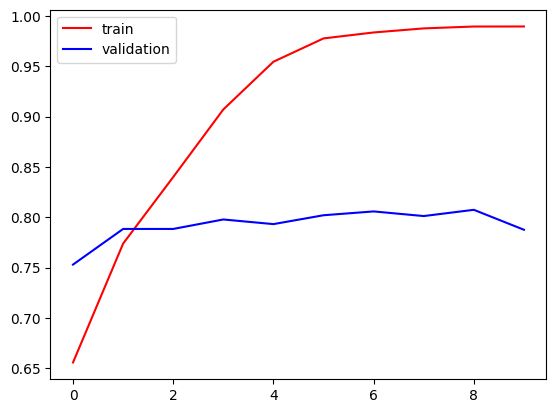

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

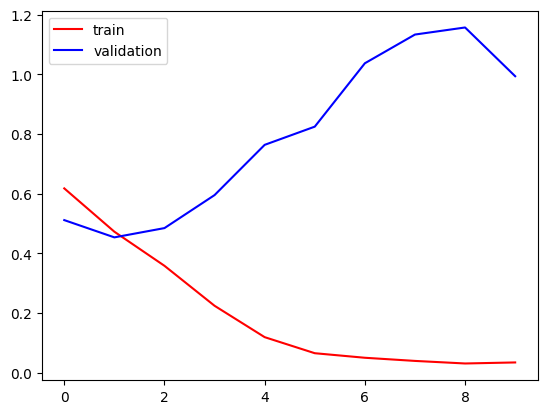

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

#Techniques to Reduce Overfitting :

1. Adding more data

2. Data Augmentation

3. L1/L2 Regularization

4. Dropout layers

5. Batch Normalization

6. Reducing model complexity

In [12]:
# We add BatchNormalization for reduce overfitting
# Create CNN model
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history=model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 77ms/step - accuracy: 0.5746 - loss: 2.8443 - val_accuracy: 0.6676 - val_loss: 0.5948
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.7035 - loss: 0.5682 - val_accuracy: 0.7278 - val_loss: 0.6378
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7648 - loss: 0.4814 - val_accuracy: 0.7960 - val_loss: 0.4428
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.8118 - loss: 0.4163 - val_accuracy: 0.8004 - val_loss: 0.4286
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8459 - loss: 0.3513 - val_accuracy: 0.7502 - val_loss: 0.5955
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 77ms/step - accuracy: 0.8739 - loss: 0.3012 - val_accuracy: 0.8238 - val_loss: 0.4155
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 89s 89ms/step - accuracy: 0.9127 - loss: 0.2144 - val_accuracy: 0.7564 - val_loss: 0.5977
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 77ms/step - accuracy: 0.9422 - loss: 0.1541 - 

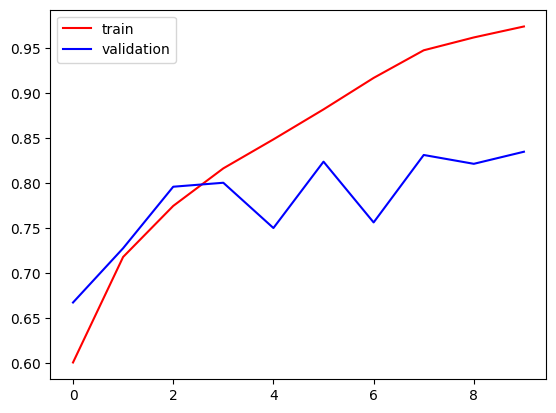

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

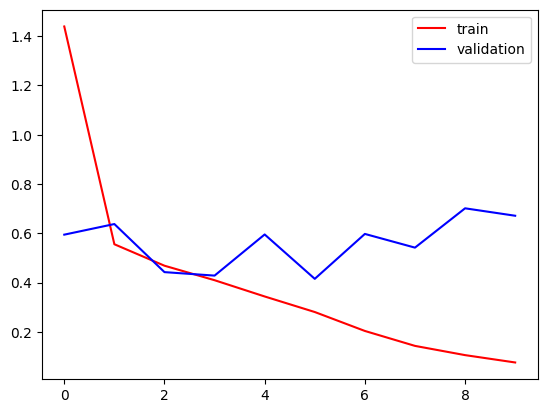

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Now we test the data

In [18]:
import cv2

In [19]:
test_img1=cv2.imread('/content/cat.jpeg')
test_img2= cv2.imread('/content/dog.jpeg')

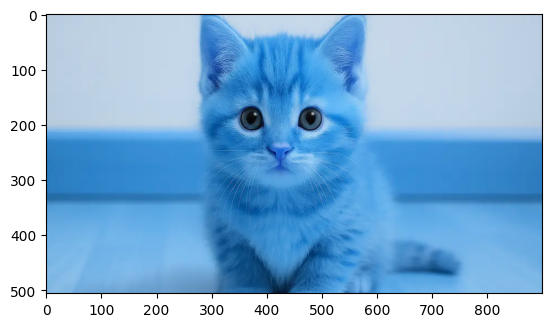

In [20]:
plt.imshow(test_img1)

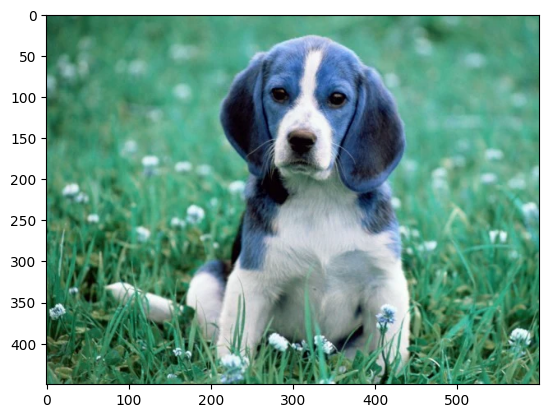

In [21]:
plt.imshow(test_img2)

In [22]:
test_img1.shape

(506, 900, 3)

In [23]:
test_img1=cv2.resize(test_img1,(256,256))
test_img2=cv2.resize(test_img2,(256,256))

In [24]:
test_input1= test_img1.reshape((1,256,256,3))
test_input2= test_img2.reshape((1,256,256,3))

In [25]:
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step


array([[1.]], dtype=float32)

In [26]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.]], dtype=float32)

Data Augmentaion

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
batch_size=16
train_datagen= ImageDataGenerator(rescale=1./255,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  shear_range=0.2)
test_datagen= ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory(
    directory=os.path.join(dataset_path, 'train'),
    target_size=(256,256),
    batch_size=batch_size,
    class_mode='binary'
)
# This is for validation test data
validation_generator= test_datagen.flow_from_directory(
    directory=os.path.join(dataset_path, 'test'),
    target_size=(256,256),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [29]:
# We add BatchNormalization  and Data Augmentation for reduce overfitting
# Create CNN model
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history=model.fit(train_generator,epochs=10, validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 334s 261ms/step - accuracy: 0.5409 - loss: 3.2199 - val_accuracy: 0.5772 - val_loss: 0.9694
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 331s 265ms/step - accuracy: 0.6257 - loss: 0.6623 - val_accuracy: 0.6722 - val_loss: 0.6619
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 350s 280ms/step - accuracy: 0.7015 - loss: 0.5786 - val_accuracy: 0.7516 - val_loss: 0.5124
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 333s 266ms/step - accuracy: 0.7573 - loss: 0.5082 - val_accuracy: 0.7812 - val_loss: 0.4641
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 326s 261ms/step - accuracy: 0.7859 - loss: 0.4637 - val_accuracy: 0.7642 - val_loss: 0.5020
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 340s 272ms/step - accuracy: 0.8103 - loss: 0.4248 - val_accuracy: 0.7896 - val_loss: 0.4507
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 337s 270ms/step - accuracy: 0.8325 - loss: 0.3770 - val_accuracy: 0.8092 - val_loss: 0.4394
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 329s 263ms/step - ac

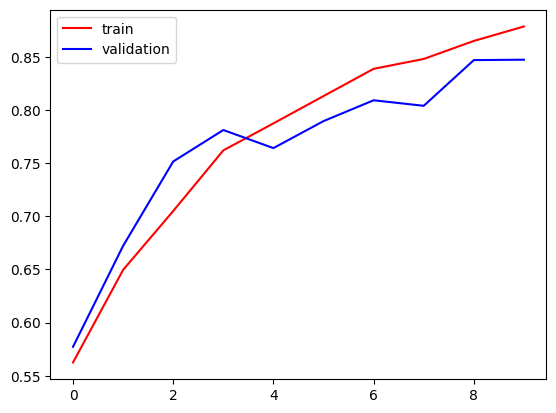

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

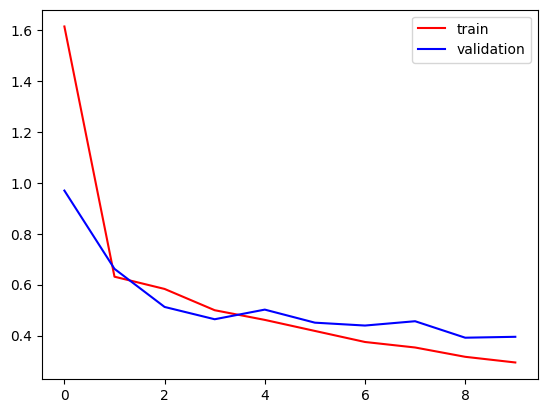

In [34]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()





#Results :

The model with both batch normalization and data augmentation achieved the highest accuracy.

Overfitting was significantly reduced compared to the basic CNN model.

#Conclusion :

This project demonstrated the effectiveness of batch normalization and data augmentation in improving CNN performance and reducing overfitting. These techniques help in building more generalizable models for image classification tasks.